# EDA

DESCRIPTION: The data represents the P2P loans offered to individuals using a third party platform that bring them together

Goal of this EDA exercise: The end of this analysis is to come-up with exploratory story(as-is) and a data quality understanding

In [288]:
#import reqd libraries
import pandas as pd #mathematical operations
import numpy as np #list comprehension
import matplotlib.pyplot as plt
import seaborn as sb #more fast than plt in case of dataframe visualization
#modular coding: organised/ step by step
#seaborn is more modular
#more beautiful graphics
#plt cannot access some graphs through API but seaborn can
#which means seaborn can access packages across the live web but plt can't

In [289]:
import os
os.getcwd()
os.chdir("/Users/macmojave/Desktop/IPBA/python1")

In [290]:
import dqr
%run dqr.py

In [291]:
#import datasets

#Transactional
loan= pd.read_csv('loan.csv')
#Demographics
demo=pd.read_csv('demo.csv')

In [292]:
#top rows
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,issue_d,loan_status,term
0,54734,80364,25000,25000,19419.94,11.89%,829.10,B,B4,True,26-07-2009,05-08-2009,Fully Paid,36months
1,55742,114426,7000,7000,6549.40,10.71%,228.22,B,B5,False,12-05-2008,27-05-2008,Fully Paid,36months
2,57245,138150,1200,1200,1200.00,13.11%,40.50,C,C2,False,11-03-2010,22-03-2010,Fully Paid,36months
3,57416,139635,10800,10800,10637.65,13.57%,366.86,C,C3,False,04-11-2009,12-11-2009,Fully Paid,36months
4,58524,149512,7200,7200,1800.00,19.05%,264.11,D,D4,False,14-08-2012,21-08-2012,Current,36months


In [293]:
demo.head()

,id,emp_name,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_city,addr_state
0,446026,Severstal North America,10+ years,OWN,122000.0,,debt_consolidation,Good credit here,SILVER SPRING,MD
1,449093,NaN,< 1 year,RENT,32400.0,,debt_consolidation,life consolidation,ARTESIA,CA
2,449172,Pyramid Services Inc,9 years,RENT,42140.0,,debt_consolidation,Looking to get ahead,LANCASTER,CA
3,449668,desert valley medical group,5 years,RENT,27840.0,,debt_consolidation,debt consolidation,NORTH LAS VEGAS,NV
4,450747,"Baptist International Missions, Inc.",10+ years,OWN,25800.0,,home_improvement,home improvements,LEWISVILLE,TX


In [294]:
demo.tail()

,id,emp_name,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_city,addr_state
13097,564269,Cornerstone OnDemand,< 1 year,RENT,110000.0,NaN,debt_consolidation,Credit Card,Santa Monica,CA
13098,564291,Evergreen Unified School District,9 years,OWN,90000.0,NaN,home_improvement,Home Imrovement,Morgan Hill,CA
13099,564308,exempla,10+ years,MORTGAGE,53664.0,NaN,home_improvement,loan,erie,CO
13100,564317,Kaiser Permanente,10+ years,MORTGAGE,48000.0,NaN,debt_consolidation,Dez CC Debt Consolidation,Alameda,CA
13101,564321,RR Donnelley and Sons,4 years,RENT,32004.0,NaN,debt_consolidation,Eric,LITITZ,PA


In [295]:
#merge transactional and demographics together
final_dataset= pd.merge(loan,demo, on='id', how= 'left')

In [296]:
final_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,...,term,emp_name,emp_length,home_ownership,annual_inc,desc,purpose,title,addr_city,addr_state
0,54734,80364,25000,25000,19419.94,11.89%,829.10,B,B4,True,...,36months,NaN,< 1 year,RENT,85000.0,Due to a lack of personal finance education an...,debt_consolidation,Debt consolidation for on-time payer,San Francisco,CA
1,55742,114426,7000,7000,6549.40,10.71%,228.22,B,B5,False,...,36months,CNN,< 1 year,RENT,65000.0,Just want to pay off the last bit of credit ca...,credit_card,Credit Card payoff,Brooklyn,NY
2,57245,138150,1200,1200,1200.00,13.11%,40.50,C,C2,False,...,36months,city of beaumont texas,10+ years,OWN,54000.0,"If funded, I would use this loan consolidate t...",debt_consolidation,zxcvb,beaumont,TX
3,57416,139635,10800,10800,10637.65,13.57%,366.86,C,C3,False,...,36months,State Farm Insurance,6 years,RENT,32000.0,I currently have a personal loan with Citifina...,debt_consolidation,Nicolechr1978,Waterbury,CT
4,58524,149512,7200,7200,1800.00,19.05%,264.11,D,D4,False,...,36months,Arkwright,9 years,RENT,58000.0,"Credit cards are out of here, I am tired of be...",debt_consolidation,caminijio,West Warwick,RI


In [297]:
final_dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term', 'emp_name', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'title', 'addr_city',
       'addr_state'],
      dtype='object')

In [298]:
#Dictionary 
#key:value pair
Dict = ['Amit', 'is', 'conducting', 'session']
List = {1:'Amit', 2: 'is', 3:'conducting', 4:'session'}

In [299]:
print(Dict)

['Amit', 'is', 'conducting', 'session']


In [300]:
print(List)

{1: 'Amit', 2: 'is', 3: 'conducting', 4: 'session'}


In [301]:
final_dataset.dtypes

id                   int64
member_id            int64
loan_amnt            int64
funded_amnt          int64
funded_amnt_inv    float64
int_rate            object
installment        float64
grade               object
sub_grade           object
is_inc_v              bool
accept_d            object
issue_d             object
loan_status         object
term                object
emp_name            object
emp_length          object
home_ownership      object
annual_inc         float64
desc                object
purpose             object
title               object
addr_city           object
addr_state          object
dtype: object

In [302]:
final_dataset.loan_amnt.quantile([0.1,0.25,0.5,0.75,0.99])
#most amt above 0.99 percentile

0.10     3000.0
0.25     5000.0
0.50     9000.0
0.75    14375.0
0.99    25000.0
Name: loan_amnt, dtype: float64

In [303]:
print(final_dataset.loan_amnt.max())
print(final_dataset.loan_amnt.mean())
print(final_dataset.loan_amnt.min())

32875
10106.810029003205
500


In [304]:
final_dataset.funded_amnt.quantile([0.1,0.25,0.5,0.75,0.99])

0.10     3000.0
0.25     5000.0
0.50     8500.0
0.75    14000.0
0.99    25000.0
Name: funded_amnt, dtype: float64

In [305]:
#getting more insights about loan amount and funded amount
print(final_dataset.funded_amnt.max())
print(final_dataset.funded_amnt.mean())
print(final_dataset.funded_amnt.min())

32875
9865.669363455962
500


In [306]:
#2
final_dataset.funded_amnt_inv.isnull().sum()/len(final_dataset.funded_amnt_inv)

0.0

In [307]:
final_dataset.funded_amnt_inv.count()

13102

In [308]:
# This function separately created as DQR
# def dataQuality(data):
#    d={}
#    def numeric_quantity(data):
#        def q1(x):
#            return x.quantile(0.25)
#        def q3(x):
#            return x.quantile(0.75)
#        def q99(x):
#            return x.quantile(0.99)
#        def count(x):
#            return x.count()
#        def miss_per(x):
#            return x.isnull().sum()/len(x)
#        def unique(x):
#            return len(x.unique())
#        qr= dict()
    
# select only numeric datatypes
# syntax- oops concept
# object=data, function=select_dtypes

#        data = data.select_dtypes(include=[np.number])
    
#        for i in np.arange(0, len(data.columns),1):
#            xi = data.agg({data.columns[i]:[count , unique, miss_per, np.min, np.max, np.mean, np.median, np.std, q1,q3,q99]})
#            df1 = pd.DataFrame(qr)
#            #df1.index=xi.index
#            df1.index = ["Count", "Unique", "Miss_per", "Min", "Max", "Mean", "Median", "Std", "Q1", "Q3", "Q99"]
#            df1 = df1.T.sort_values(by = 'Miss_per', ascending = False)
#        return df1[df1['Miss_per'<0.15]] #Optional step(where 0.15 value is also optional)
#    d['numeric'] = numeric_quality(data)
        
#    def cat_quantity(data):
#        def count(x):
#            return x.count()
#        def miss_per(x):
#            return x.isnull().sum()/len(x)
#        def unique(x):
#            return len(x.unique())
#        def freq_cat(x):
#            return x.value_counts().sort_values(ascending= False).index[0]
#        def freq_cat_per(x):
#            return x.value_counts().sort_values(ascending= False).index[0]/len(x)
#        qr= dict()
#        #select only object datatypes
#        data = data.select_dtypes(include = [object])
        
#        for i in np.arange(0, len(data.columns),1):
#            xi = data.agg({data.columns[i]:[count , unique, miss_per, freq_cat, freq_cat_per]})
#            df2 = pd.DataFrame(qr)
#            #df2.index=xi.index
#            df2.index = ["Count", "Unique", "Miss_per", "Freq_level", "freq_cat_Per"]
#            df2 = df2.T.sort_values(by = 'Miss_per', ascending = False)
#        return df2[df2['Miss_per'<0.15]] #Optional step(where 0.15 value is also optional)
#    d['categorical'] = cat_quantity(data)  
#    return d

In [309]:
r1 = dataQuality(final_dataset)

In [310]:
r1['numeric']

,Count,Unique,Miss_per,Min,Max,Mean,Median,Std,Q1,Q3,q99
id,13102.0,13102.0,0.0,54734.00,5.643210e+05,451217.198748,469786.50,87777.850367,406038.25,514895.750000,561950.87
member_id,13102.0,13102.0,0.0,70699.00,7.261130e+05,550598.053351,591153.00,141085.818027,450348.75,665106.250000,723029.90
loan_amnt,13102.0,477.0,0.0,500.00,3.287500e+04,10106.810029,9000.00,6269.629402,5000.00,14375.000000,25000.00
funded_amnt,13102.0,643.0,0.0,500.00,3.287500e+04,9865.669363,8500.00,6067.713492,5000.00,14000.000000,25000.00
funded_amnt_inv,13102.0,5207.0,0.0,0.00,2.844569e+04,9186.143833,7975.00,5790.303300,4900.00,12372.804228,24800.00
installment,13102.0,6080.0,0.0,15.69,1.043890e+03,317.581097,270.41,201.748192,164.57,423.280000,870.39
annual_inc,13102.0,2531.0,0.0,4000.00,6.000000e+06,68391.509640,56000.00,91640.651869,40000.00,80000.000000,239970.00


In [311]:
r1['categorical']

,Count,Unique,Miss_per,Freq_Level,freq_cat_Per
emp_name,12365,10488,0.056251,Self Employed,0.002442
emp_length,12939,12,0.012441,10+ years,0.185697
title,13092,9147,0.000763,Debt Consolidation,0.035491
int_rate,13102,269,0.0,7.88%,0.041139
grade,13102,7,0.0,B,0.30896
sub_grade,13102,35,0.0,A5,0.08533
accept_d,13102,1142,0.0,11-05-2010,0.005572
issue_d,13102,831,0.0,31-05-2010,0.015417
loan_status,13102,7,0.0,Fully Paid,0.719356
term,13102,2,0.0,36months,0.902534


In [312]:
#int_rate is a numerical variable but shown in categorical
final_dataset.int_rate.head()
#the problem is the '%' symbol

0    11.89%
1    10.71%
2    13.11%
3    13.57%
4    19.05%
Name: int_rate, dtype: object

In [313]:
#Purpose of loans taken in P2P
pie= final_dataset['purpose'].value_counts()/final_dataset.shape[0]
pie

debt_consolidation    0.430240
other                 0.132117
credit_card           0.130133
home_improvement      0.068463
major_purchase        0.060830
small_business        0.050221
car                   0.030224
wedding               0.024805
educational           0.023966
medical               0.015799
moving                0.014273
house                 0.010075
vacation              0.007022
renewable_energy      0.001832
Name: purpose, dtype: float64

In [314]:
final_dataset['term'].value_counts()/final_dataset.shape[0]

36months    0.902534
60months    0.097466
Name: term, dtype: float64

In [315]:
#python pivot table
pd.crosstab(final_dataset['loan_status'],final_dataset['term'])/final_dataset.shape[0]

term,36months,60months
loan_status,,
Charged Off,0.102580,0.013204
Current,0.096092,0.057091
Default,0.000458,0.000000
Fully Paid,0.695772,0.023584
In Grace Period,0.001832,0.001374
Late (16-30 days),0.000687,0.000076
Late (31-120 days),0.005114,0.002137


In [316]:
pd.crosstab(final_dataset['loan_status'],final_dataset['home_ownership'])/final_dataset.shape[0]

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,0.044802,0.000000,0.001298,0.008854,0.060830
Current,0.069608,0.000000,0.000076,0.010380,0.073119
Default,0.000076,0.000000,0.000000,0.000076,0.000305
Fully Paid,0.284231,0.000229,0.006106,0.060907,0.367883
In Grace Period,0.001603,0.000000,0.000000,0.000153,0.001450
Late (16-30 days),0.000153,0.000000,0.000000,0.000076,0.000534
Late (31-120 days),0.003129,0.000000,0.000000,0.000305,0.003816


# Exploratory Analysis Outcomes

1. Cannot analyze interest rate as it is currently captured as string
2. 72% of the borrowers on the P2P platform are repaying their loan completely, but
3. Almost 60% of them are using the loan amount for Consolidation and repaying past debts... (that could be the reason that most of the loans on P2P are of short term (~90%))
4. This debt consolidation reason observed on P2P platform could be related to housing loan aspects as 1/3rd of the borrowers are having housing mortgage. 



Talking to business ppl
* Let me check the data quality issues, by far this picture is coming up
* EDA done, data quality aspects need to be worked around, data manipulation will help to get a better picture, and validate the model. later predictive modelling

# Data Manipulation | Feature Engineering

1. Fix interest rate as a feature

In [317]:
final_dataset['int_rate']=final_dataset['int_rate'].str.replace('%','').astype('float')

In [318]:
final_dataset.int_rate.head()

0    11.89
1    10.71
2    13.11
3    13.57
4    19.05
Name: int_rate, dtype: float64

In [319]:
final_dataset.groupby('term')['int_rate'].mean()

term
36months    11.720473
60months    13.947525
Name: int_rate, dtype: float64

/Users/macmojave/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of the interest rate')

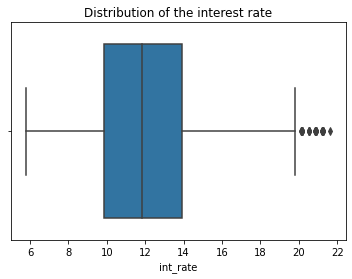

In [320]:
sb.boxplot(final_dataset['int_rate'])
plt.title("Distribution of the interest rate")

In [321]:
final_dataset[final_dataset.int_rate > 20].shape[0]

43

In [322]:
final_dataset.shape[0]

13102

2.Finding outlier:
    2. a) Using boxplot
    2. b) Using IQR

In [323]:
def find_iqr(x):
    return np.subtract(*np.percentile(x,[75,25]))

In [324]:
#Calculate the IQR Inter Quartile Range
q75, q25 = np.percentile(final_dataset['int_rate'], [75,25])
iqr = q75-q25

In [325]:
iqr

4.039999999999999

In [326]:
final_dataset[['int_rate','loan_amnt']].apply(find_iqr)

int_rate        4.04
loan_amnt    9375.00
dtype: float64

3. Capping outliers on both the sides of distribution

In [327]:
#Code for capping

#for int_rate in final_dataset.columns:
    #percentile = final_dataset['int_rate'].quantile([0.01,0.99]).values
    #final_dataset['int_rate'][final_dataset['int_rate']<= percentile[0]]=percentile[0]
    #final_dataset['int_rate'][final_dataset['int_rate']>= percentile[1]]=percentile[1]

In [328]:
#Code for capping

#for col in final_dataset.columns:
    #percentile = final_dataset['col'].quantile([0.01,0.99]).values
    #final_dataset['col'][final_dataset['col']<= percentile[0]]=percentile[0]
    #final_dataset['col'][final_dataset['col']>= percentile[1]]=percentile[1]

In [329]:
final_dataset.annual_inc.head(10)

0     85000.0
1     65000.0
2     54000.0
3     32000.0
4     58000.0
5     85000.0
6     80800.0
7    148000.0
8     45000.0
9     54000.0
Name: annual_inc, dtype: float64

/Users/macmojave/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of the Annual Income')

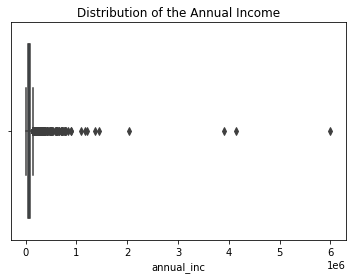

In [330]:
sb.boxplot(final_dataset['annual_inc'])
plt.title("Distribution of the Annual Income")

4. Common generic continuous features converted to categorical features

In [331]:
#Create a list of conditions
condition = [
    (final_dataset['annual_inc'] <= 10000),
    (final_dataset['annual_inc'] > 10000) & (final_dataset['annual_inc'] <= 40000),
    (final_dataset['annual_inc'] > 40000) & (final_dataset['annual_inc'] <= 60000),
    (final_dataset['annual_inc'] > 60000) & (final_dataset['annual_inc'] <= 100000),
    (final_dataset['annual_inc'] > 100000)
]

#create a list of categorical values related to these conditions
values = ['tier1','tier2','tier3','tier4','tier5']

#create a new column
final_dataset['income_bucket'] = np.select(condition,values)

In [332]:
final_dataset.income_bucket.head(20)

0     tier4
1     tier4
2     tier3
3     tier2
4     tier3
5     tier4
6     tier4
7     tier5
8     tier3
9     tier3
10    tier3
11    tier4
12    tier2
13    tier2
14    tier5
15    tier3
16    tier4
17    tier2
18    tier3
19    tier2
Name: income_bucket, dtype: object

In [333]:
final_dataset['income_bucket'].value_counts()

tier4    3939
tier3    3851
tier2    3496
tier5    1762
tier1      54
Name: income_bucket, dtype: int64

In [334]:
#buckets very unevenly divided, hence reshuffling
#Create a list of conditions
condition = [
    (final_dataset['annual_inc'] <= 40000),
    (final_dataset['annual_inc'] > 40000) & (final_dataset['annual_inc'] <= 60000),
    (final_dataset['annual_inc'] > 60000) & (final_dataset['annual_inc'] <= 100000),
    (final_dataset['annual_inc'] > 100000)
]

#create a list of categorical values related to these conditions
values = ['tier1','tier2','tier3','tier4']

#create a new column
final_dataset['income_bucket'] = np.select(condition,values)

In [335]:
final_dataset['income_bucket'].value_counts()

tier3    3939
tier2    3851
tier1    3550
tier4    1762
Name: income_bucket, dtype: int64

#around 50% population have ann income >50k, gives some confidence in lending


In [336]:
final_dataset.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d',
       'issue_d', 'loan_status', 'term', 'emp_name', 'emp_length',
       'home_ownership', 'annual_inc', 'desc', 'purpose', 'title', 'addr_city',
       'addr_state', 'income_bucket'],
      dtype='object')

5. Filter needed columns for ML models

In [337]:
MRD = final_dataset.filter(['loan_amnt', 'funded_amnt', 'funded_amnt_inv','int_rate', 'installment', 'grade', 'sub_grade', 'is_inc_v', 'accept_d','loan_status', 'term', 'emp_length',
       'home_ownership','income_bucket','purpose'], axis= 1)

In [338]:
MRD.head() 

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,loan_status,term,emp_length,home_ownership,income_bucket,purpose
0,25000,25000,19419.94,11.89,829.10,B,B4,True,26-07-2009,Fully Paid,36months,< 1 year,RENT,tier3,debt_consolidation
1,7000,7000,6549.40,10.71,228.22,B,B5,False,12-05-2008,Fully Paid,36months,< 1 year,RENT,tier3,credit_card
2,1200,1200,1200.00,13.11,40.50,C,C2,False,11-03-2010,Fully Paid,36months,10+ years,OWN,tier2,debt_consolidation
3,10800,10800,10637.65,13.57,366.86,C,C3,False,04-11-2009,Fully Paid,36months,6 years,RENT,tier1,debt_consolidation
4,7200,7200,1800.00,19.05,264.11,D,D4,False,14-08-2012,Current,36months,9 years,RENT,tier2,debt_consolidation


In [339]:
MRD.loan_status.head(10)

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4        Current
5     Fully Paid
6     Fully Paid
7     Fully Paid
8    Charged Off
9     Fully Paid
Name: loan_status, dtype: object

# 6. Encode Features

# 6a. Label Encoding

In [340]:
#Target variable
from sklearn import preprocessing
#object
label_encoder = preprocessing.LabelEncoder()

#Encode labels in the column loan_status(TV)
MRD['TV'] = label_encoder.fit_transform(MRD['loan_status'])
print(MRD.TV.head())

0    3
1    3
2    3
3    3
4    1
Name: TV, dtype: int64


In [341]:
MRD.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,loan_status,term,emp_length,home_ownership,income_bucket,purpose,TV
0,25000,25000,19419.94,11.89,829.10,B,B4,True,26-07-2009,Fully Paid,36months,< 1 year,RENT,tier3,debt_consolidation,3
1,7000,7000,6549.40,10.71,228.22,B,B5,False,12-05-2008,Fully Paid,36months,< 1 year,RENT,tier3,credit_card,3
2,1200,1200,1200.00,13.11,40.50,C,C2,False,11-03-2010,Fully Paid,36months,10+ years,OWN,tier2,debt_consolidation,3
3,10800,10800,10637.65,13.57,366.86,C,C3,False,04-11-2009,Fully Paid,36months,6 years,RENT,tier1,debt_consolidation,3
4,7200,7200,1800.00,19.05,264.11,D,D4,False,14-08-2012,Current,36months,9 years,RENT,tier2,debt_consolidation,1


In [342]:
del MRD['loan_status']

In [343]:
#OR
#MRD = MRD.drop(['loan_status'], axis=1, inplace= True)

In [349]:
MRD.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,term,emp_length,home_ownership,income_bucket,purpose,TV
0,25000,25000,19419.94,11.89,829.10,B,B4,True,26-07-2009,36months,< 1 year,RENT,tier3,debt_consolidation,3
1,7000,7000,6549.40,10.71,228.22,B,B5,False,12-05-2008,36months,< 1 year,RENT,tier3,credit_card,3
2,1200,1200,1200.00,13.11,40.50,C,C2,False,11-03-2010,36months,10+ years,OWN,tier2,debt_consolidation,3
3,10800,10800,10637.65,13.57,366.86,C,C3,False,04-11-2009,36months,6 years,RENT,tier1,debt_consolidation,3
4,7200,7200,1800.00,19.05,264.11,D,D4,False,14-08-2012,36months,9 years,RENT,tier2,debt_consolidation,1


# 6b. One-hot encoding

In [347]:
#Feature Variables (Independent variables)

MRD_1= pd.get_dummies(MRD, columns= ['income_bucket'])

In [350]:
MRD_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,is_inc_v,accept_d,term,emp_length,home_ownership,purpose,TV,income_bucket_tier1,income_bucket_tier2,income_bucket_tier3,income_bucket_tier4
0,25000,25000,19419.94,11.89,829.10,B,B4,True,26-07-2009,36months,< 1 year,RENT,debt_consolidation,3,0,0,1,0
1,7000,7000,6549.40,10.71,228.22,B,B5,False,12-05-2008,36months,< 1 year,RENT,credit_card,3,0,0,1,0
2,1200,1200,1200.00,13.11,40.50,C,C2,False,11-03-2010,36months,10+ years,OWN,debt_consolidation,3,0,1,0,0
3,10800,10800,10637.65,13.57,366.86,C,C3,False,04-11-2009,36months,6 years,RENT,debt_consolidation,3,1,0,0,0
4,7200,7200,1800.00,19.05,264.11,D,D4,False,14-08-2012,36months,9 years,RENT,debt_consolidation,1,0,1,0,0


In [351]:
#Feature Variable
from sklearn import preprocessing
#object
label_encoder = preprocessing. LabelEncoder()
#Encode labels in the column loan_status(TV)
MRD_1['purpose_encoded'] = label_encoder.fit_transform(MRD_1['purpose'])
print(MRD.TV.head())

0    3
1    3
2    3
3    3
4    1
Name: TV, dtype: int64
